# Laboratorio de regresión - 2

|                |   |
:----------------|---|
| **Nombre**     |  Regina Tamayo |
| **Fecha**      | 3 feb 2026  |
| **Expediente** |757857   |

## Regresión polinomial

Observa la siguiente gráfica.

In [1]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = x.reshape(-1, 1)

lr= LinearRegression()
lr.fit(X, y)


LinearRegression()

In [19]:
y_pred_linear = lr.predict(X)

In [20]:
lr.intercept_

np.float64(13.30223225795873)

In [21]:
lr.coef_

array([-0.04955448])

y = 13.302232 - 0.04955x

Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

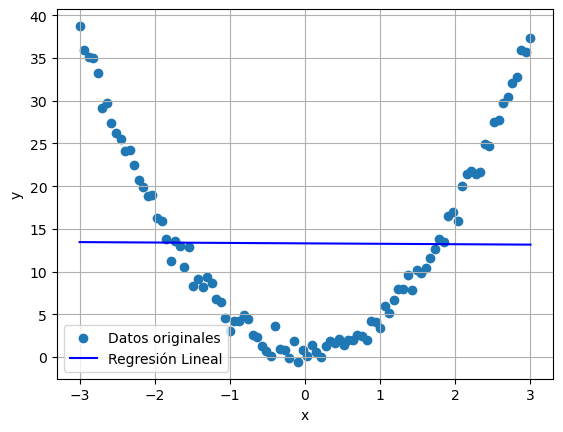

R^2 Regresión Lineal: 0.0001


In [22]:
plt.scatter(x, y, label='Datos originales')
plt.plot(x, y_pred_linear, color='blue', label='Regresión Lineal')
plt.xlabel("x"); plt.ylabel("y"); plt.grid(); plt.legend()
plt.show()

r2_linear = r2_score(y, y_pred_linear)
print(f"R^2 Regresión Lineal: {r2_linear:.4f}")

In [46]:
import statsmodels.api as sm
X_stat = sm.add_constant(X)
model_simple = sm.OLS(y, X_stat).fit()
model_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                  0.005688
Date:                Tue, 03 Feb 2026   Prob (F-statistic):              0.940
Time:                        10:58:26   Log-Likelihood:                -385.08
No. Observations:                 100   AIC:                             774.2
Df Residuals:                      98   BIC:                             779.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3022      1.150     11.572      0.000      11.021      15.583
x1            -0.0496      0.657     -0.075      0.940      -1.353       1.254
==============================================================================
Omnibus:                       13.784   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.669
Skew:                           0.633   Prob(JB):                      0.00795
Kurtosis:                       2.153   Cond. No.                         1.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

Crea una gráfica con las observaciones y la nueva curva que ajustaste.

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X)

lr2 = LinearRegression()
lr2.fit(X_poly2, y)

LinearRegression()

In [32]:
y_pred_poly2 = lr2.predict(X_poly2)

In [33]:
lr2.intercept_

np.float64(0.6194209631804846)

In [35]:
lr2.coef_

array([ 0.        , -0.04955448,  4.14388884])

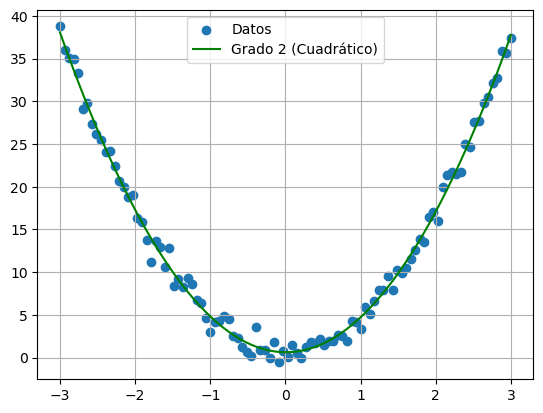

R^2 Grado 2: 0.9934


In [36]:
plt.scatter(x, y, label='Datos')
plt.plot(x, y_pred_poly2, color='green', label='Grado 2 (Cuadrático)')
plt.grid(); plt.legend(); plt.show()

print(f"R^2 Grado 2: {r2_score(y, y_pred_poly2):.4f}")

Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

Crea una gráfica por cada modelo con las observaciones y su curva.

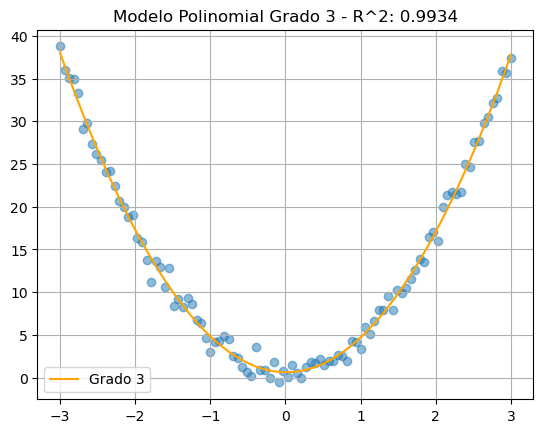

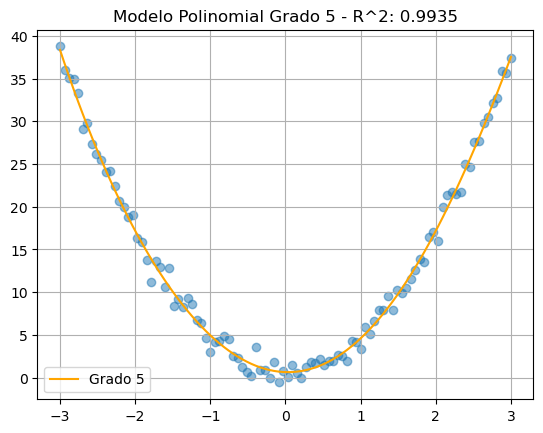

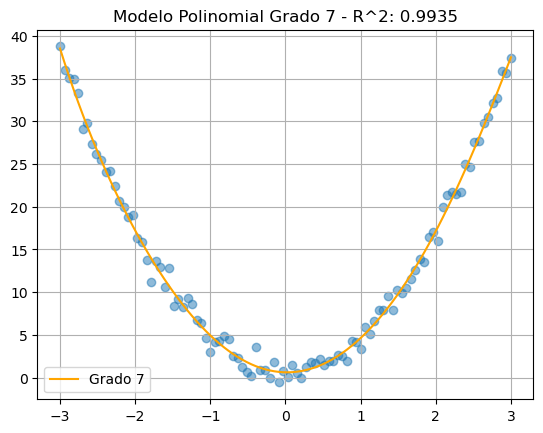

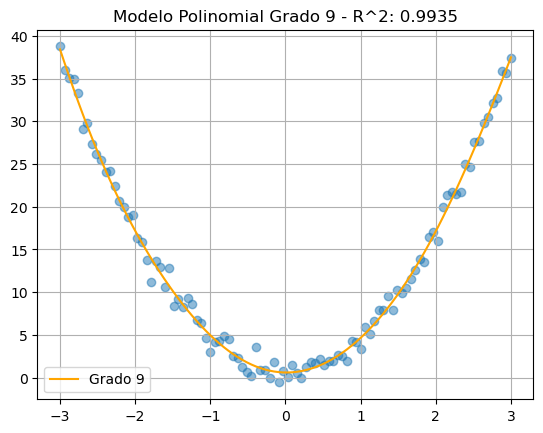

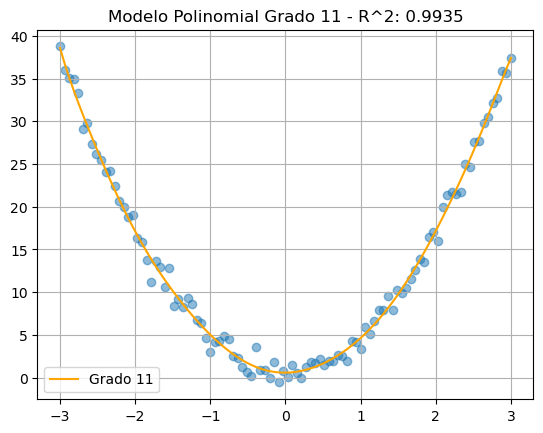

In [42]:
grados = [3, 5, 7, 9, 11]
modelos = {}

for g in grados:
    
    poly = PolynomialFeatures(degree=g)
    X_g = poly.fit_transform(X)
    
    lr3 = LinearRegression().fit(X_g, y)
    y_p = lr3.predict(X_g)
    
    r2 = r2_score(y, y_p)
    modelos[g] = lr3
    
    plt.figure()
    plt.scatter(x, y, alpha=0.5)
    plt.plot(x, y_p, color='orange', label=f'Grado {g}')
    plt.title(f"Modelo Polinomial Grado {g} - R^2: {r2:.4f}")
    plt.legend(); plt.grid(); plt.show()

**¿Cuál modelo consideras que es mejor? ¿Por qué?**

El modelo de grado 2 tiene un R^2 de 0.9934. Agregar más grados (como el 11) solo sube el R^2 a 0.9935 (una diferencia insignificante), pero complica el modelo innecesariamente.

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

In [43]:
x_extrapolar = np.array([[5]])
grados_todos = [2, 3, 5, 7, 9, 11]

print("Predicciones para x = 5:")
for g in grados_todos:
    poly = PolynomialFeatures(degree=g)
    
    X_point = poly.fit_transform(x_extrapolar)
    
    X_train = poly.fit_transform(X)
    m_temp = LinearRegression().fit(X_train, y)
    
    pred = m_temp.predict(X_point)
    print(f"Grado {g:2d}: {pred[0]:.4f}")

Predicciones para x = 5:
Grado  2: 103.9689
Grado  3: 104.2523
Grado  5: 84.5990
Grado  7: 33.7432
Grado  9: 215.7364
Grado 11: -5265.3443


¿Cuál modelo crees que sea mejor?

Al calcular la predicción para x=5, el modelo de grado 11 da un valor absurdo (-5265.34), mientras que el de grado 2 da un valor lógico (103.96). Esto porque los polinomios de grado alto son muy inestables fuera del rango [-3, 3].

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3